In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Read the housing data file
housing_data = pd.read_csv('/Users/marcelosilva/Desktop/Hands-on/data/raw/housing/housing.csv')

# Display basic information about the dataset
print("Dataset shape:", housing_data.shape)
print("\nFirst few rows:")
print(housing_data.head())
print("\nDataset info:")
print(housing_data.info())


Dataset shape: (20640, 10)

First few rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset info:
<class 'pandas.c

Features numéricas para correlação: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

Mediana de total_bedrooms: 435.0

Correlações com median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


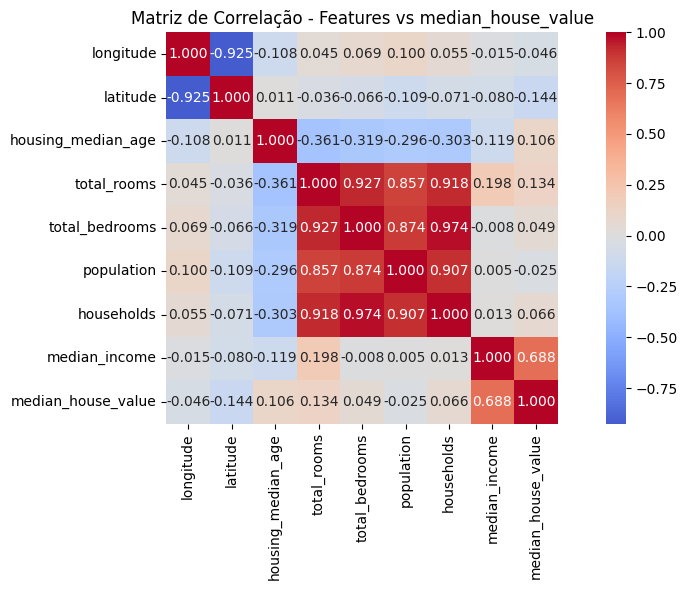

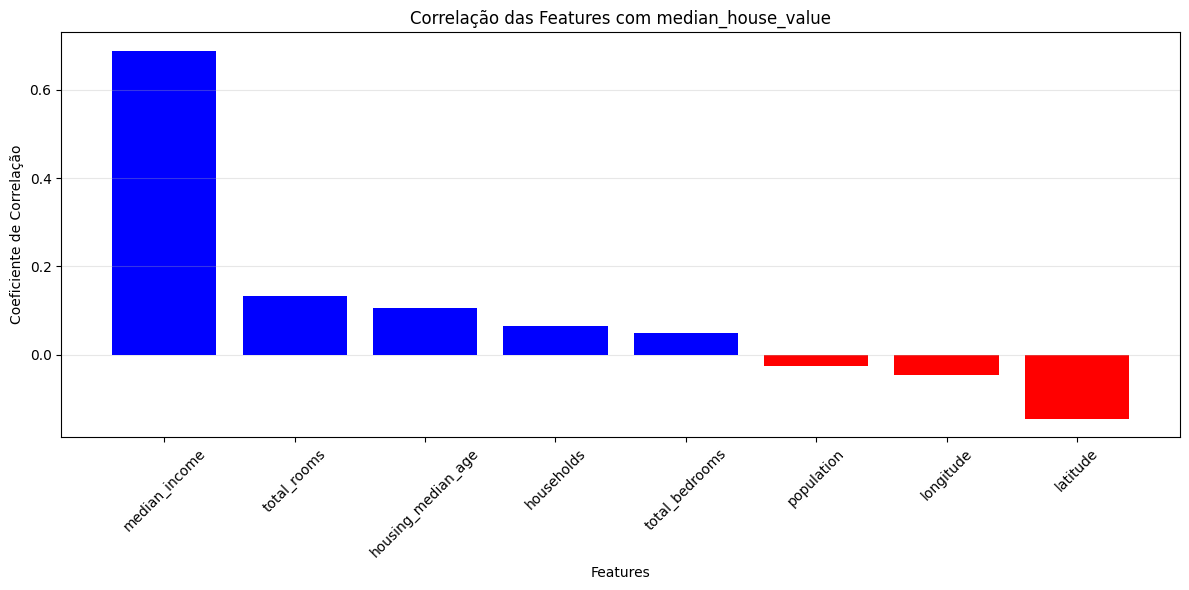

In [3]:
# Selecionar apenas as colunas numéricas (float64) para correlação
numeric_columns = housing_data.select_dtypes(include=['float64']).columns.tolist()

# Remover a coluna target (median_house_value) da lista de features
features_for_correlation = [col for col in numeric_columns if col != 'median_house_value']

print("Features numéricas para correlação:", features_for_correlation)

# Tratar valores faltantes em total_bedrooms com a mediana
median_bedrooms = housing_data['total_bedrooms'].median()
housing_data['total_bedrooms_filled'] = housing_data['total_bedrooms'].fillna(median_bedrooms)

print(f"\nMediana de total_bedrooms: {median_bedrooms}")

# Calcular correlação entre features e target
correlation_data = housing_data[features_for_correlation + ['median_house_value']].copy()
correlation_data['total_bedrooms'] = housing_data['total_bedrooms_filled']

# Calcular matriz de correlação
correlation_matrix = correlation_data.corr()

# Mostrar correlações com median_house_value
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("\nCorrelações com median_house_value:")
print(target_correlations)

# Criar visualização da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Matriz de Correlação - Features vs median_house_value')
plt.tight_layout()
plt.show()

# Gráfico de barras das correlações
plt.figure(figsize=(12, 6))
target_correlations_plot = target_correlations.drop('median_house_value')  # Remove auto-correlação
colors = ['red' if x < 0 else 'blue' for x in target_correlations_plot.values]

plt.bar(range(len(target_correlations_plot)), target_correlations_plot.values, color=colors)
plt.xticks(range(len(target_correlations_plot)), target_correlations_plot.index, rotation=45)
plt.title('Correlação das Features com median_house_value')
plt.ylabel('Coeficiente de Correlação')
plt.xlabel('Features')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


=== ANÁLISE DE CORRELAÇÃO: OCEAN_PROXIMITY vs MEDIAN_HOUSE_VALUE ===

1. ESTATÍSTICAS DESCRITIVAS POR CATEGORIA:
                 count       mean        std    median       min       max
ocean_proximity                                                           
<1H OCEAN         9136  240084.29  106124.29  214850.0   17500.0  500001.0
INLAND            6551  124805.39   70007.91  108500.0   14999.0  500001.0
ISLAND               5  380440.00   80559.56  414700.0  287500.0  450000.0
NEAR BAY          2290  259212.31  122818.54  233800.0   22500.0  500001.0
NEAR OCEAN        2658  249433.98  122477.15  229450.0   22500.0  500001.0



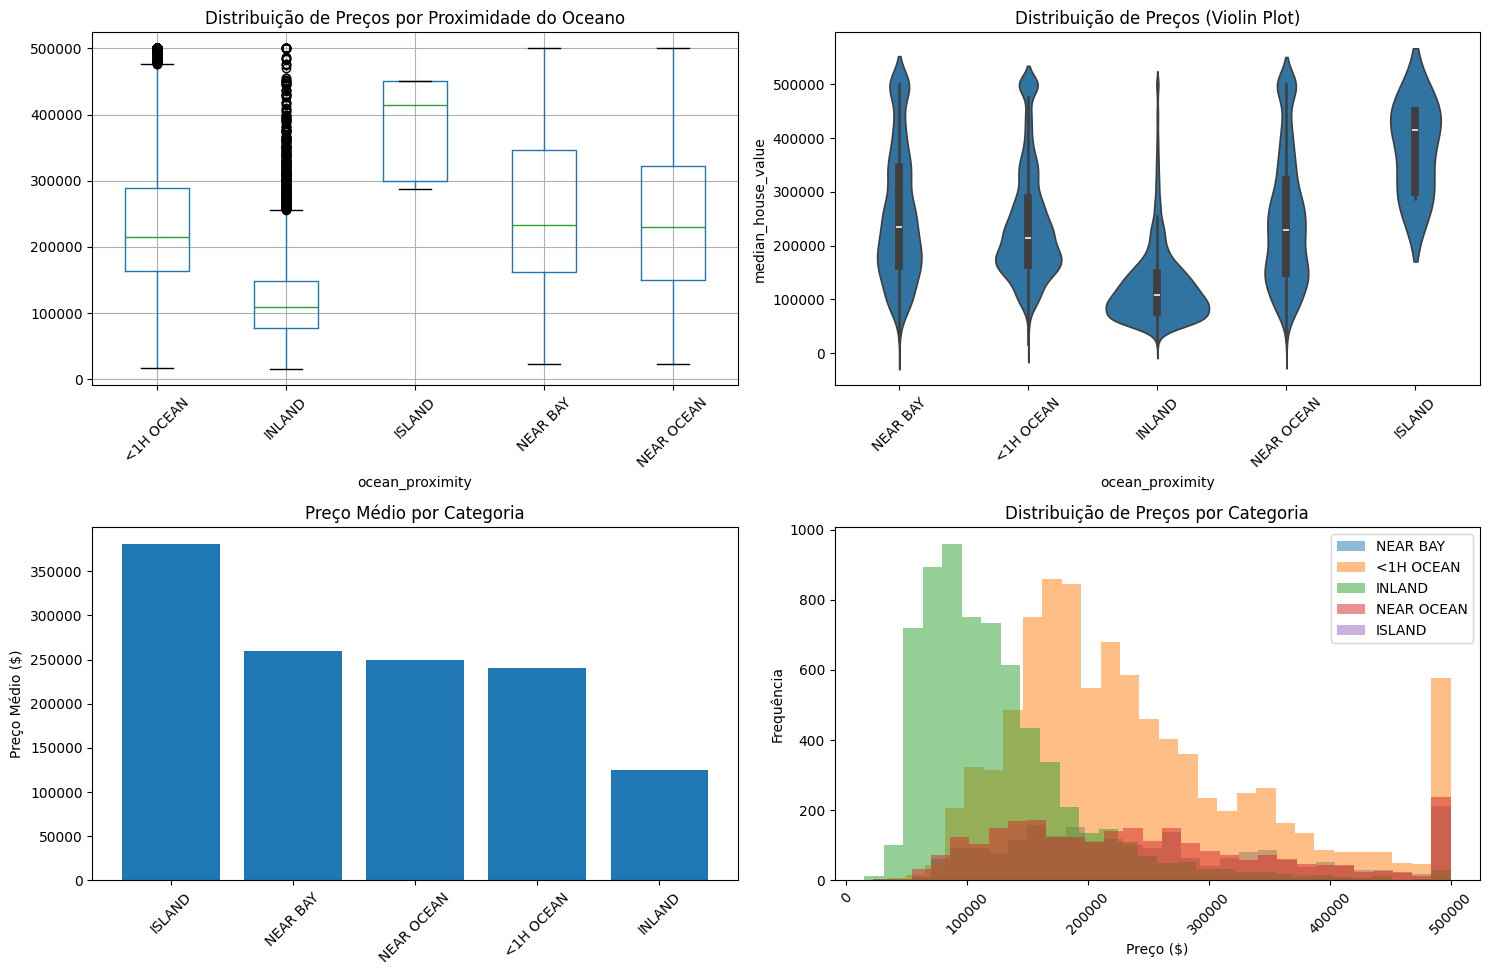


2. TESTE ANOVA DE 1 FATOR:
F-statistic: 1612.1407
p-value: 0.0000000000
Resultado: REJEITA H₀
Conclusão: Existe diferença significativa entre as médias dos grupos

3. CÁLCULO DO ETA-SQUARED (η²):
SS_between: 65437156038570.21
SS_total: 274831981936881.91
Eta-squared (η²): 0.2381
Tamanho do efeito: GRANDE

4. TESTE KRUSKAL-WALLIS (NÃO PARAMÉTRICO):
H-statistic: 6634.5629
p-value: 0.0000000000
Resultado: REJEITA H₀
Conclusão: Existe diferença significativa entre as medianas dos grupos

5. R² COM REGRESSÃO LINEAR USANDO DUMMIES:
R² da regressão: 0.2381
Comparação com η²: 0.000000 (diferença)

6. RESUMO FINAL:
• ANOVA p-value: 0.0000000000 (SIGNIFICATIVO)
• Kruskal-Wallis p-value: 0.0000000000 (SIGNIFICATIVO)
• Eta-squared (η²): 0.2381 (GRANDE)
• R² regressão: 0.2381

CONCLUSÃO:
✅ CORRELAÇÃO FORTE: A proximidade do oceano tem influência significativa e moderada/forte no preço das casas.


In [4]:

# Análise da relação entre ocean_proximity (categórica) e median_house_value (contínua)

print("=== ANÁLISE DE CORRELAÇÃO: OCEAN_PROXIMITY vs MEDIAN_HOUSE_VALUE ===\n")

# 1. Estatísticas descritivas por categoria
print("1. ESTATÍSTICAS DESCRITIVAS POR CATEGORIA:")
print("=" * 50)
category_stats = housing_data.groupby('ocean_proximity')['median_house_value'].agg([
    'count', 'mean', 'std', 'median', 'min', 'max'
]).round(2)
print(category_stats)
print()

# 2. Visualização da distribuição
plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
housing_data.boxplot(column='median_house_value', by='ocean_proximity', ax=plt.gca())
plt.title('Distribuição de Preços por Proximidade do Oceano')
plt.suptitle('')  # Remove título automático
plt.xticks(rotation=45)

# Violin plot
plt.subplot(2, 2, 2)
sns.violinplot(data=housing_data, x='ocean_proximity', y='median_house_value')
plt.title('Distribuição de Preços (Violin Plot)')
plt.xticks(rotation=45)

# Bar plot com médias
plt.subplot(2, 2, 3)
means_by_category = housing_data.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)
plt.bar(range(len(means_by_category)), means_by_category.values)
plt.xticks(range(len(means_by_category)), means_by_category.index, rotation=45)
plt.title('Preço Médio por Categoria')
plt.ylabel('Preço Médio ($)')

# Histograma por categoria
plt.subplot(2, 2, 4)
for category in housing_data['ocean_proximity'].unique():
    subset = housing_data[housing_data['ocean_proximity'] == category]['median_house_value']
    plt.hist(subset, alpha=0.5, label=category, bins=30)
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Teste ANOVA de 1 fator
print("\n2. TESTE ANOVA DE 1 FATOR:")
print("=" * 50)

from scipy import stats

# Preparar dados para ANOVA
categories = housing_data['ocean_proximity'].unique()
groups = [housing_data[housing_data['ocean_proximity'] == cat]['median_house_value'].values 
          for cat in categories]

# Teste ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Resultado: {'REJEITA H₀' if p_value < 0.05 else 'NÃO REJEITA H₀'}")
print(f"Conclusão: {'Existe diferença significativa' if p_value < 0.05 else 'Não há diferença significativa'} entre as médias dos grupos")

# 4. Cálculo do Eta-squared (η²)
print("\n3. CÁLCULO DO ETA-SQUARED (η²):")
print("=" * 50)

# Calcular SS_total
grand_mean = housing_data['median_house_value'].mean()
ss_total = sum((housing_data['median_house_value'] - grand_mean) ** 2)

# Calcular SS_between (effect)
ss_between = 0
for cat in categories:
    group_mean = housing_data[housing_data['ocean_proximity'] == cat]['median_house_value'].mean()
    group_size = len(housing_data[housing_data['ocean_proximity'] == cat])
    ss_between += group_size * (group_mean - grand_mean) ** 2

eta_squared = ss_between / ss_total

print(f"SS_between: {ss_between:.2f}")
print(f"SS_total: {ss_total:.2f}")
print(f"Eta-squared (η²): {eta_squared:.4f}")

# Interpretação do efeito
if eta_squared < 0.01:
    effect_size = "NULO"
elif eta_squared < 0.06:
    effect_size = "PEQUENO"
elif eta_squared < 0.14:
    effect_size = "MÉDIO"
else:
    effect_size = "GRANDE"

print(f"Tamanho do efeito: {effect_size}")

# 5. Teste Kruskal-Wallis (não paramétrico)
print("\n4. TESTE KRUSKAL-WALLIS (NÃO PARAMÉTRICO):")
print("=" * 50)

h_stat, kw_p_value = stats.kruskal(*groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {kw_p_value:.10f}")
print(f"Resultado: {'REJEITA H₀' if kw_p_value < 0.05 else 'NÃO REJEITA H₀'}")
print(f"Conclusão: {'Existe diferença significativa' if kw_p_value < 0.05 else 'Não há diferença significativa'} entre as medianas dos grupos")

# 6. R² com regressão linear usando dummies
print("\n5. R² COM REGRESSÃO LINEAR USANDO DUMMIES:")
print("=" * 50)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Codificar ocean_proximity
le = LabelEncoder()
housing_data['ocean_proximity_encoded'] = le.fit_transform(housing_data['ocean_proximity'])

# Criar dummies
dummies = pd.get_dummies(housing_data['ocean_proximity'], prefix='ocean', drop_first=True)

# Regressão linear
X = dummies
y = housing_data['median_house_value']

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)

print(f"R² da regressão: {r_squared:.4f}")
print(f"Comparação com η²: {abs(r_squared - eta_squared):.6f} (diferença)")

# 7. Resumo final
print("\n6. RESUMO FINAL:")
print("=" * 50)
print(f"• ANOVA p-value: {p_value:.10f} {'(SIGNIFICATIVO)' if p_value < 0.05 else '(NÃO SIGNIFICATIVO)'}")
print(f"• Kruskal-Wallis p-value: {kw_p_value:.10f} {'(SIGNIFICATIVO)' if kw_p_value < 0.05 else '(NÃO SIGNIFICATIVO)'}")
print(f"• Eta-squared (η²): {eta_squared:.4f} ({effect_size})")
print(f"• R² regressão: {r_squared:.4f}")

print("\nCONCLUSÃO:")
if p_value < 0.05 and eta_squared > 0.06:
    print("✅ CORRELAÇÃO FORTE: A proximidade do oceano tem influência significativa e moderada/forte no preço das casas.")
elif p_value < 0.05 and eta_squared <= 0.06:
    print("⚠️ CORRELAÇÃO FRACA: A proximidade do oceano tem influência significativa, mas fraca no preço das casas.")
else:
    print("❌ SEM CORRELAÇÃO: A proximidade do oceano não tem influência significativa no preço das casas.")



After analyzing the data, we opted for this strategy:

**Proposed Strategy:**
The test set will have exactly 2 records from the "ISLAND" category. The remaining test data (to complete ≈20% of the dataset) will be obtained through stratified sampling based on income_cat (median_income bins). This ensures 1) income representativeness – the most explanatory variable – and 2) at least some ISLAND examples to verify how the model extrapolates.

**How to implement (conceptually):**
1. Separate the 5 ISLAND rows
   - Define `is_island = df.ocean_proximity == "ISLAND"`
   - Keep 3 rows in training, 2 in the test "pool" (choose via fixed seed for reproducibility)

2. Create income_cat in the NON-ISLAND subset
   - Suggested bins from the book: [0–1.5, 1.5–3, 3–4.5, 4.5–6, > 6]
   - This generates 5 relatively balanced strata

3. Apply StratifiedShuffleSplit (test_size = 0.20) only to this non-ISLAND block
   - Use fixed random_state
   - Obtain train_idx, test_idx

4. Combine
   - Final test = test_idx rows + the 2 ISLAND rows
   - Final training = train_idx rows + the remaining 3 ISLAND rows

5. Verify proportions
   - Calculate income_cat percentages in full dataset vs. new test (Δ ≤ 3 p.p.)
   - Confirm that all 5 ocean_proximity categories now appear: <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND (2 rows)

**Documentation:**
Write in README: "Hold-out contains 2/5 ISLAND rows (40%) due to sample scarcity; remaining 98% of hold-out generated via stratification by income_cat."

**Benefits:**
- Test set reflects income distribution, which explains ~70% of price variation
- At least two "ISLAND" examples allow checking error in this class without unbalancing global metrics
- Training still has 3 ISLAND rows, reducing extrapolation risk without reference

**Limitation:**
- ISLAND-specific metrics remain volatile (N=2), but already provide an indication
- If ISLAND records increase in the future, simply reapply the same rule (40% in test; stratification in the rest)

If this meets your requirements, simply follow this procedure when building the hold-out.
